In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import networkx as nx
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
df=pd.read_csv('tool/all_ai_tool.csv')
df

AI Tool Name                                        Description  \
0             Farm3D  Learning Articulated 3D Animals by Distilling ...   
1      Mailbutler Ai  AI-powered Smart Assistant for Outlook, Gmail ...   
2          Maverick      Send customers personalized videos at scale.     
3               0Xai      Stable Diffusion Prompt And Images Generator    
4              10Web  AI-powered WordPress platform for automated we...   
...              ...                                                ...   
4964         Zoom Iq  Capture meaningful and actionable insights fro...   
4965    Zoomscape Ai  ZoomScape AI is an AI-powered tool that enable...   
4966         Zust Qr  Enables users to craft artistic QR codes by in...   
4967            Zuva          Contract analysis and insight generation.   
4968            Zyng  Generation of promotional images without desig...   

          Free/Paid/Other                          Useable For    Charges  \
0                    Free                / experiments    / 3D        NaN   
1                Freemium                    / email assistant  $ 4.95/mo   
2                    Paid      / e-commerce    / audio editing   $ 100/mo   
3                    Free       / image generator    / prompts        NaN   
4                Freemium                   / low-code/no-code        NaN   
...                   ...                                  ...        ...   
4964  Contact for Pricing    / summarizer    / email assistant        NaN   
4965           Free Trial                      / presentations        $5    
4966                 Free                    / image generator        NaN   
4967           Free Trial                    / legal assistant    $ 50/mo   
4968                 Free    / e-commerce    / image generator        NaN   

     Review                                          Tool Link Major Category  
0       NaN  https://farm3d.github.io/?utm_source=futureped...          other  
1         1  https://www.mailbutler.io/smart-assistant/?utm...           text  
2       NaN  https://www.trymaverick.com/?utm_source=future...          audio  
3       NaN  https://0xai.quest?utm_source=futurepedia&utm_...          image  
4       NaN  https://10web.io/?utm_source=futurepedia&utm_m...           code  
...     ...                                                ...            ...  
4964      2  https://blog.zoom.us/zoom-iq-smart-companion/?...           text  
4965    NaN  https://zoomscape.ai/?utm_source=futurepedia&u...       business  
4966    NaN  https://qr.zust.ai/?utm_source=futurepedia&utm...          image  
4967      1  https://zuva.ai/widget/try-it/?utm_source=futu...       business  
4968    NaN  https://www.zyngai.com/?utm_source=futurepedia...          image  

[4969 rows x 8 columns]

In [4]:
df = df.rename(columns={'AI Tool Name': 'aitool','Major Category': 'majorcategory','Useable For': 'useablefor','Tool Link': 'toollink'})

In [5]:
rows,cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  4969
Number of columns:  8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aitool           4969 non-null   object
 1   Description      4969 non-null   object
 2   Free/Paid/Other  4969 non-null   object
 3   useablefor       4969 non-null   object
 4   Charges          2534 non-null   object
 5   Review           1462 non-null   object
 6   toollink         4969 non-null   object
 7   majorcategory    4969 non-null   object
dtypes: object(8)
memory usage: 310.7+ KB


In [7]:
df.describe()

aitool                             Description Free/Paid/Other  \
count      4969                                    4969            4969   
unique     4969                                    4965              19   
top      Farm3D  Understand any data instantly using AI            Free   
freq          1                                       2            1704   

              useablefor  Charges Review  \
count               4969     2534   1462   
unique               526      557     17   
top       / productivity  $ 10/mo      1   
freq                 247       99    942   

                                                 toollink majorcategory  
count                                                4969          4969  
unique                                               4959             8  
top     https://www.trymaverick.com/?utm_source=future...      business  
freq                                                    2          1202

# DATASET OVERVIEW

In [8]:
# Number of tools in the dataset
total_tools = df.shape[0]

# Number of missing values for each column
missing_values = df.isnull().sum()

dataset_overview = {
    "Total AI Tools": total_tools,
    "Missing Descriptions": missing_values["Description"],
    "Missing Pricing Info": missing_values["Free/Paid/Other"],
    "Missing Use Cases": missing_values["useablefor"],
    "Missing Charges Info": missing_values["Charges"],
    "Missing Reviews": missing_values["Review"],
    "Missing Tool Links": missing_values["toollink"],
    "Missing Major Categories": missing_values["majorcategory"]
}

dataset_overview

{'Total AI Tools': 4969,
 'Missing Descriptions': 0,
 'Missing Pricing Info': 0,
 'Missing Use Cases': 0,
 'Missing Charges Info': 2435,
 'Missing Reviews': 3507,
 'Missing Tool Links': 0,
 'Missing Major Categories': 0}

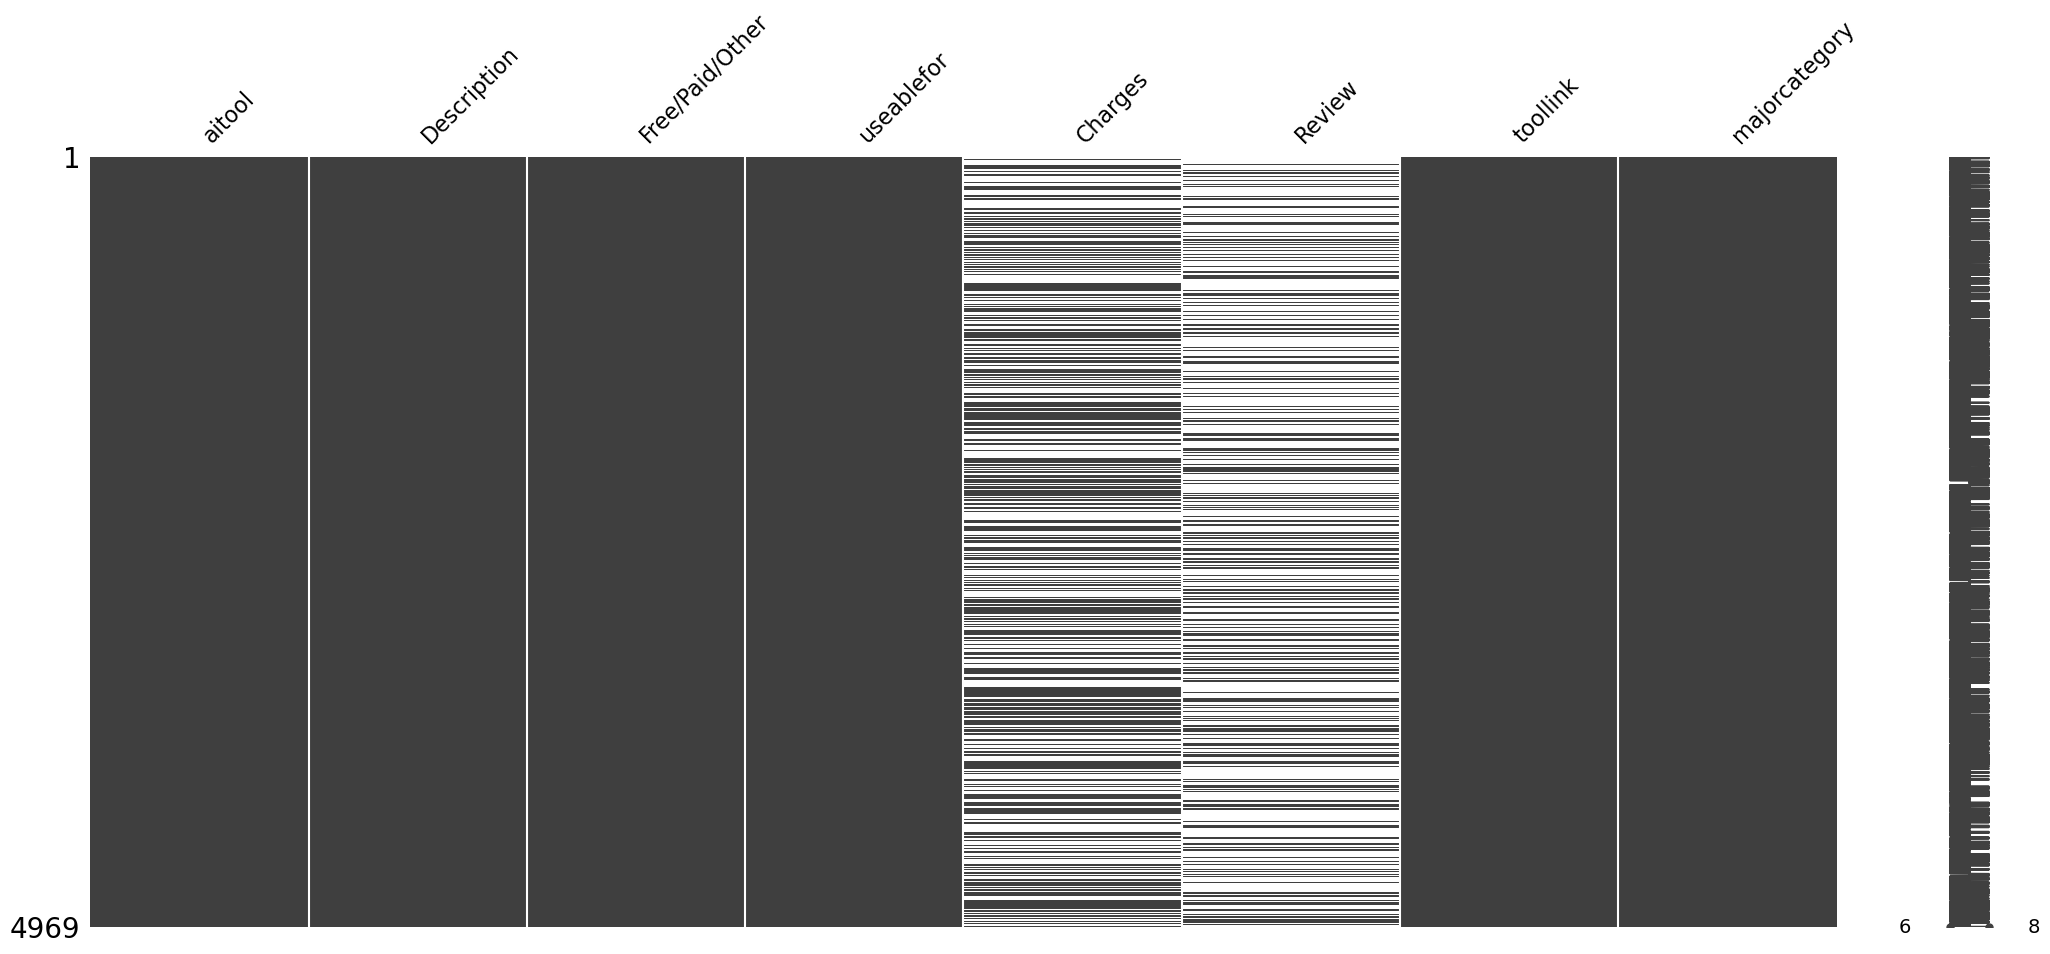

In [9]:
 # check for missing values
msno.matrix(df);

In [10]:
# Summary
charges_summary = df['Charges'].describe()
print(charges_summary)

count        2534
unique        557
top       $ 10/mo
freq           99
Name: Charges, dtype: object


In [11]:
# Pricing Distribution
pricing_distribution = df["Free/Paid/Other"].value_counts()

pricing_distribution

Free/Paid/Other
Free                             1704
Freemium                         1284
Paid                              832
Free Trial                        771
Contact for Pricing               325
Freemium | Free-Trial              15
Freemium | Deals                    8
Free-Trial | Paid                   8
Free-Trial | Freemium               8
Free-Trial | Deals                  3
Paid |Free-Trial                    3
FreeDeals                           1
FreeFreemium                        1
Freemium |Contact for Pricing       1
Freemium | Free                     1
Paid | Deals                        1
Free | Freemium | Paid              1
Free | Paid                         1
Deals                               1
Name: count, dtype: int64

In [12]:
# Category Distribution
category_distribution = df["majorcategory"].value_counts()

category_distribution

majorcategory
business    1202
text        1115
other        849
image        740
code         583
audio        330
video        110
3D            40
Name: count, dtype: int64

In [13]:
# Reviews Overview
reviews_overview = df["Review"].describe()

reviews_overview

count     1462
unique      17
top          1
freq       942
Name: Review, dtype: object

In [14]:
# Distribution of unique review values
review_distribution = df["Review"].value_counts()

review_distribution

Review
1            942
2            256
3            108
4             53
6             20
5             20
8             17
7             16
9              8
10             6
11             4
undefined      3
14             3
13             2
15             2
42             1
22             1
Name: count, dtype: int64

In [15]:
# Filtering tools with reviews greater than 1 and sorting them
top_tools_by_review = df[df["Review"] > "1"].sort_values(by="Review", ascending=False).head(10)

# Selecting relevant columns for display
top_tools_by_review = top_tools_by_review[["aitool", "Description", "Review", "majorcategory", "toollink"]]

top_tools_by_review

aitool                                        Description  \
1854  Gocharlie Ai    A generative AI platform for content creators!    
4637      Vidyo.Ai  Create short clips from long videos, save 90% ...   
2666      Maverick          AI-generated personalized videos at scale   
4468      Ttsmaker  Free text-to-speech tool that offers over 100+...   
4204       Syllaby    Create Your Social Media Strategy In 10 Minutes   
1907  Gptforslides  Generate Beautiful Presentations with Images, ...   
1326         Docus  Providing personalized health insights, recomm...   
4420        Traivl    Personalized multi-destination Travel Itinerary   
4256      Tammy Ai  YouTube summaries for free. 10x your learning ...   
656       Booke Ai  Streamline your bookkeeping business with AI-d...   

         Review majorcategory  \
1854  undefined          text   
4637  undefined         video   
2666  undefined         video   
4468          9         audio   
4204          9          text   
1907          9      business   
1326          9         other   
4420          9         other   
4256          9      business   
656           9      business   

                                               toollink  
1854  https://gocharlie.ai/?utm_source=futurepedia&u...  
4637  https://vidyo.ai/?utm_source=futurepedia&utm_m...  
2666  https://www.trymaverick.com/?utm_source=future...  
4468  https://ttsmaker.com?utm_source=futurepedia&ut...  
4204  https://www.syllaby.io?utm_source=futurepedia&...  
1907  https://www.gptforslides.app/?utm_source=futur...  
1326  https://docus.ai/?utm_source=futurepedia&utm_m...  
4420  https://www.traivl.com/?utm_source=futurepedia...  
4256  https://tammy.ai/?utm_source=futurepedia&utm_m...  
656   https://booke.ai?utm_source=futurepedia&utm_me...

In [16]:
# Charges Distribution: Displaying the most common pricing structures or charges for AI tools
charges_distribution = df["Charges"].value_counts().head(10)

charges_distribution

Charges
$ 10/mo      99
$ 9/mo       90
$ 19/mo      88
$ 29/mo      72
$ 5/mo       68
$ 9.99/mo    62
$ 15/mo      62
$ 20/mo      53
$5           46
$ 49/mo      45
Name: count, dtype: int64

##Here's the distribution of the most common pricing structures or charges for AI tools:
$10/month: 99 tools

$9/month: 90 tools

$19/month: 88 tools

$29/month: 72 tools

$5/month: 68 tools

$9.99/month: 62 tools

$15/month: 62 tools

$20/month: 53 tools

$5 (one-time or unspecified): 46 tools

$49/month: 45 tools

This provides a glimpse into the prevalent pricing models in the AI tool space.

# Now let's list some of the top FREE AI tools based on their categories. We'll consider the top 3 tools from each major category.

In [17]:
# Top Free Tools based on their categories
free_tools = df[df["Free/Paid/Other"] == "Free"]

# Group by major category and get top 3 tools from each category
top_free_tools_by_category = free_tools.groupby("majorcategory").head(3)

# Selecting relevant columns for display
top_free_tools_by_category = top_free_tools_by_category[["aitool", "Description", "majorcategory", "toollink"]]

top_free_tools_by_category

aitool  \
0                    Farm3D   
3                      0Xai   
5               1Pm Workout   
6     2D&3D Video Converter   
9                      3Dfy   
11            6000 Thoughts   
13                     6Pen   
20                    Accio   
25                  Acrylic   
26                Activazon   
31          Adaptiv Academy   
35                  Addy Ai   
39     Adobe Enhance Speech   
41            Adobe Podcast   
44              Adsgency Ai   
57                 Agentgpt   
59           Agentrunner.Ai   
70                   Ai Bot   
76           Ai Chat Bestie   
116           Ai Kanye West   
324         Any Image To 3D   
1161             Creatus.Ai   
1603                   Film   
1691              Fraimebot   

                                            Description majorcategory  \
0     Learning Articulated 3D Animals by Distilling ...         other   
3         Stable Diffusion Prompt And Images Generator          image   
5                        Become The Next One Punch Man!         other   
6     iDATAPP 3D Converter: Transform Your Videos in...            3D   
9     3DFY.ai is an artificial intelligence (AI) too...            3D   
11    6000 Thoughts is an innovative AI-based app de...         other   
13    6Pen Art is an AI-powered product that generat...         image   
20     AI-based tool that allows users to quickly an...          text   
25                    Custom AR artwork for home decor.         image   
26    Crime report analytic service for informed res...      business   
31    Adaptiv Academy is an AI-powered tool that hel...      business   
35    AI email assistant that can compose and reply ...          text   
39    AI-powered audio filter designed to improve sp...         audio   
41    Upgrade your audio with powerful web-based enh...         audio   
44      Level Up Your Advertising Game with AdsGency AI          text   
57    Deploy Autonomous AI Agents with AgentGPT's In...          code   
59                          Create autonomous AI agents          code   
70                 Chatbot platform for messaging apps.          code   
76    Enhanced chatbot communication via searchable ...      business   
116   AI-powered lyric generator for creating lyrics...         audio   
324   Simplifies the process of converting 2D images...            3D   
1161       Jump-Start Your Social Media With Creatus.AI         video   
1603  Generate frames between images to create anima...         video   
1691  Innovative tool that simplifies the process of...         video   

                                               toollink  
0     https://farm3d.github.io/?utm_source=futureped...  
3     https://0xai.quest?utm_source=futurepedia&utm_...  
5     https://opmworkout.ml/?utm_source=futurepedia&...  
6     https://idatapp.com/software/3d-converter?utm_...  
9     https://3dfy.ai/?utm_source=futurepedia&utm_me...  
11    https://6000thoughts.com/?utm_source=futureped...  
13    https://6pen.art/?utm_source=futurepedia&utm_m...  
20    https://accio.springworks.in/?utm_source=futur...  
25    https://acrylic.typedream.app/?utm_source=futu...  
26    https://activazon.com/?utm_source=futurepedia&...  
31    https://app.adaptiv.me/app/ask-ada?utm_source=...  
35    https://addy-ai.com?utm_source=futurepedia&utm...  
39    https://podcast.adobe.com/enhance?utm_source=f...  
41    https://podcast.adobe.com/?utm_source=futurepe...  
44    https://adsgency.ai/?utm_source=futurepedia&ut...  
57    https://agentgpt.reworkd.ai/?utm_source=theneu...  
59    https://www.agentrunner.ai/?utm_source=futurep...  
70    https://www.aibot.how/?utm_source=futurepedia&...  
76    https://aichatbestie.com/?utm_source=futureped...  
116   https://autoyeai.com/?utm_source=futurepedia&u...  
324   https://www.csm.ai/any-image-to-3d?utm_source=...  
1161  https://creatus.ai/?utm_source=futurepedia&utm...  
1603  https://replicate.com/google-research/frame-in...  
1691  https://t.me/fraimebo

# Exploring the Major Category column

In [18]:
df['majorcategory'] = df['majorcategory'].str.capitalize()

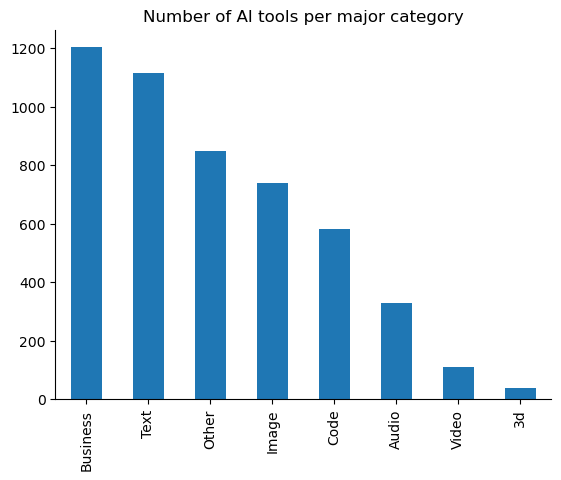

In [19]:
# Business and text categories have the most tools
df['majorcategory'].value_counts().plot(kind='bar', xlabel='', title='Number of AI tools per major category',
                                         grid=False)
sns.despine();

# Exploring Useable for column

In [20]:
def get_formatted_uses(uses):
    formatted_uses = []
    for use in uses.split('/'):
        if use := use.strip():
            formatted_uses.append(use.capitalize())
    return formatted_uses


df['useablefor'] = df['useablefor'].map(get_formatted_uses)

In [21]:
uses_count = df['useablefor'].explode().value_counts()
labels = ['Rare', 'Less common', 'Common', 'Frequent']
uses_distribution = pd.qcut(uses_count, q=4, labels=labels)

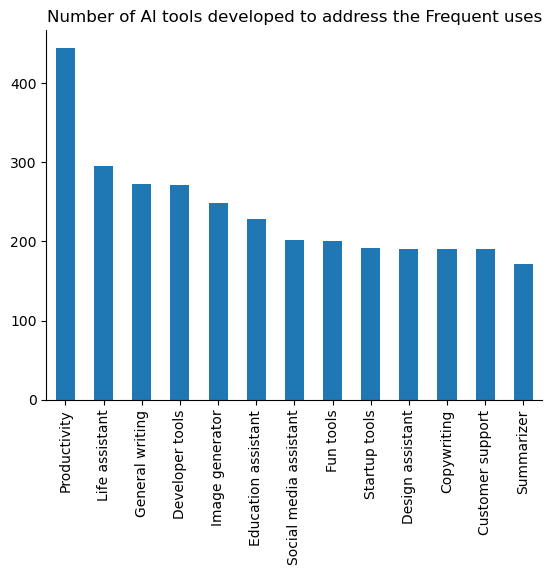

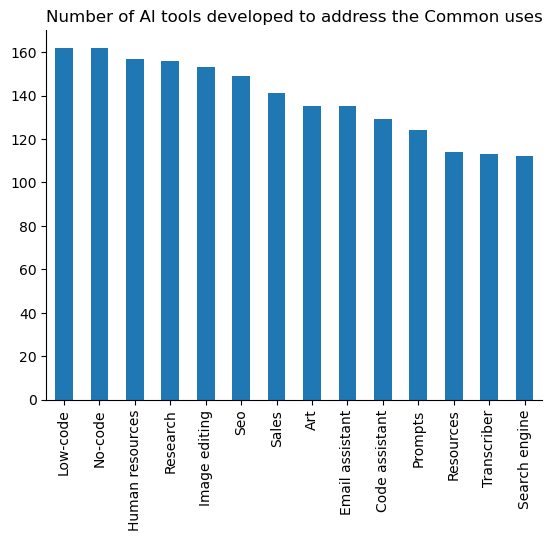

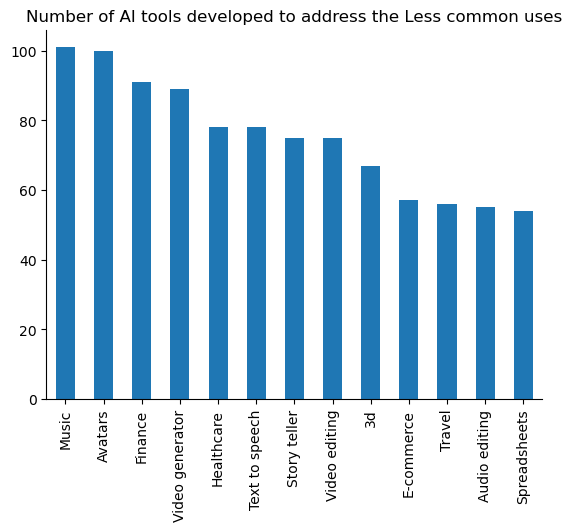

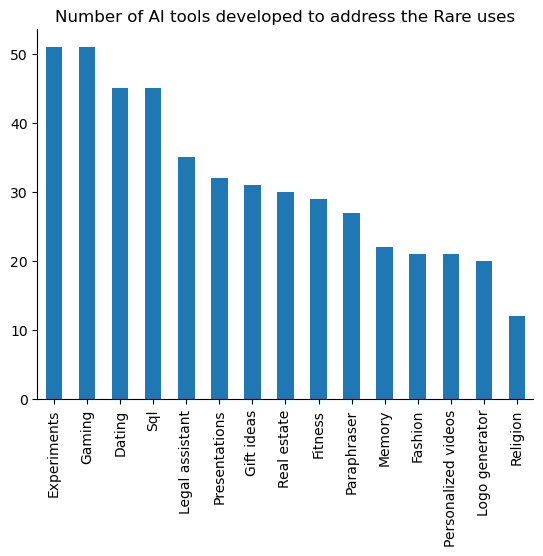

In [22]:
for label in reversed(labels):
    ax = uses_count[uses_distribution == label].plot(kind='bar', grid=False, title=f'Number of AI tools developed to address the {label} uses', xlabel='')
    sns.despine()
    plt.show();

# Explore Tool Link column

In [23]:
# There are links that don't point to a valid domain
df['toollink'] = df['toollink'].str.lower()
improper_links = df.loc[~df['toollink'].str.startswith('http'), 'toollink']
improper_links

350                                https://arcwise.app/ai
370                                  /tool/article-fiesta
630                                    /tool/block-survey
843                                         /tool/chatabc
1399                                     /tool/durable-ai
1411                                  /tool/easy-peasy.ai
1459                                        /tool/eloise-
1646                                          /tool/fliki
2052     https://www.homestyler.com/?affiliatecode=lvh...
2532                                          /tool/looka
2698                               /tool/mental-models-ai
3239                                      /tool/platepose
3858                                       /tool/sheet-ai
3882     https://www.jigso.io/lp-sidekick?utm_source=f...
4538     https://uncensoredgreats.com/?utm_source=futu...
4565                                    /tool/uptrends-ai
4897                                          /tool/xinva
4903          

In [24]:
# Based on online search, https://futurepedia.io/ seems to be the right website from which this data was obtained since /tool/<name> links contain information about the actual tool and the descriptions match
df.loc[improper_links.index, 'toollink'] = improper_links.map(lambda link: f'https://futurepedia.io{link}')

In [25]:
# Proportion of apps that aren't linked to an external site
# Since this data is skewed, we don't need a feature column to see if the link is internal or external
(df['toollink']
 .str.startswith('https://futurepedia.io/')
 .value_counts(normalize=True)
 .map(lambda proportion: f'{proportion * 100:.2f}%'))

toollink
False    99.72%
True      0.28%
Name: proportion, dtype: object

# countvectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [28]:
vector = cv.fit_transform(df['Description']).toarray()

In [29]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
similarity = cosine_similarity(vector)

In [32]:
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.14142136, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.14142136, ..., 1.        , 0.        ,
        0.14142136],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.2236068 ],
       [0.        , 0.        , 0.        , ..., 0.14142136, 0.2236068 ,
        1.        ]])

In [33]:
len(similarity[0])

4969

# To build a content-based recommendation system

#Let's begin by preprocessing the data and extracting features from the Description and Major Category columns. We will use TF-IDF to turn the textual content into a format that can be used to calculate similarity.

In [55]:
# Data Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, special characters, and numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess the Description and concatenate with Major Category for better context
df['Preprocessed'] = df['Description'].apply(preprocess_text) + " " + df['majorcategory']

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the preprocessed descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed'])

# Compute the cosine similarity matrix
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Let's take a look at the shape of the TF-IDF matrix and the similarity matrix
tfidf_matrix.shape, similarity.shape


((4969, 6041), (4969, 4969))

In [56]:
# Recommendation function to recommend similar AI tools
def recommend_ai_tools(aitool, df, similarity, top_n=5):
    # Check if the AI tool exists in the dataset
    if aitool not in df['aitool'].values:
        return "AI tool not found in the dataset."

    # Find the index of the AI tool
    idx = df.index[df['aitool'] == aitool].tolist()[0]

    # Get the pairwise similarity scores of all AI tools with that AI tool
    sim_scores = list(enumerate(similarity[idx]))

    # Sort the AI tools based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top-n most similar AI tools
    sim_scores = sim_scores[1:top_n+1]

    # Get the AI tool indices
    ai_tool_indices = [i[0] for i in sim_scores]
    # Return the top-n most similar AI tools
    return df['aitool'].iloc[ai_tool_indices]

# Testing the recommendation function with an example
recommend_ai_tools('Farm3D', df, similarity, top_n=5)


'AI tool not found in the dataset.'

In [57]:
# Let's find out if 'Farm3D' or a similar name exists in the dataset
aitool = df['aitool'].str.lower().unique()
aitool_partial_match = [name for name in aitool if 'farm' in name]
aitool_partial_match

[' farm3d']

In [58]:
# Update the recommendation function to handle discrepancies in AI tool name formatting
def recommend_ai_tools(aitool, df, similarity, top_n=5):
    # Standardize the AI tool names by stripping leading/trailing spaces and converting to lowercase
    standardized_aitool = aitool.strip().lower()
    # Find the standardized name in the dataset
    matches = df['aitool'].str.lower().str.strip() == standardized_aitool
    if not matches.any():
        return "AI tool not found in the dataset."
    
    # Get the index of the AI tool in the DataFrame
    idx = df[matches].index[0]

    # Get the pairwise similarity scores of all AI tools with that AI tool
    sim_scores = list(enumerate(similarity[idx]))

    # Sort the AI tools based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top-n most similar AI tools
    sim_scores = sim_scores[1:top_n+1]

    # Get the AI tool indices
    ai_tool_indices = [i[0] for i in sim_scores]
    
    # Return the top-n most similar AI tools
    return df['aitool'].iloc[ai_tool_indices].tolist()

# Let's try the recommendation function again with the corrected name
recommend_ai_tools('Farm3D', df, similarity, top_n=5)


['Nyx', 'Rundiffusion', 'Grammar Ai', 'Invokeai', '0Xai']

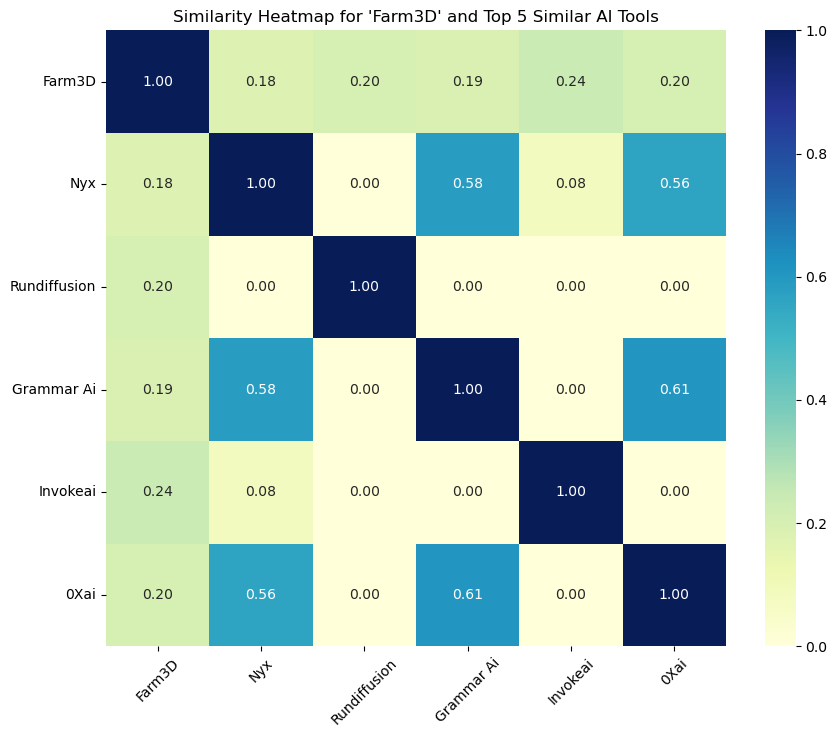

In [60]:
# Correct the function to include the original AI tool in the heatmap
def create_heatmap(aitool, df, similarity, top_n=5):
    # Get the standardized name of the AI tool
    standardized_aitool = aitool.strip().lower()
    
    # Include the AI tool itself in the list to show self-similarity
    # We need to use the standardized name here to match the DataFrame's processed names
    similar_tools_with_self = [aitool] + recommend_ai_tools(standardized_aitool, df, similarity, top_n)
    
    # Find indices for the AI tool and its similar tools
    indices = df.index[df['aitool'].str.lower().str.strip().isin([name.lower().strip() for name in similar_tools_with_self])].tolist()
    
    # Create a smaller cosine similarity matrix for the selected tools
    small_similarity = similarity[indices][:, indices]
    
    # Create a DataFrame for the smaller matrix with named indices and columns for better visualization
    sim_df = pd.DataFrame(small_similarity, index=similar_tools_with_self, columns=similar_tools_with_self)
    
    # Generate a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_df, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Similarity Heatmap for '{aitool}' and Top {top_n} Similar AI Tools")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Create the heatmap for 'Farm3D'
create_heatmap('Farm3D', df, similarity, top_n=5)

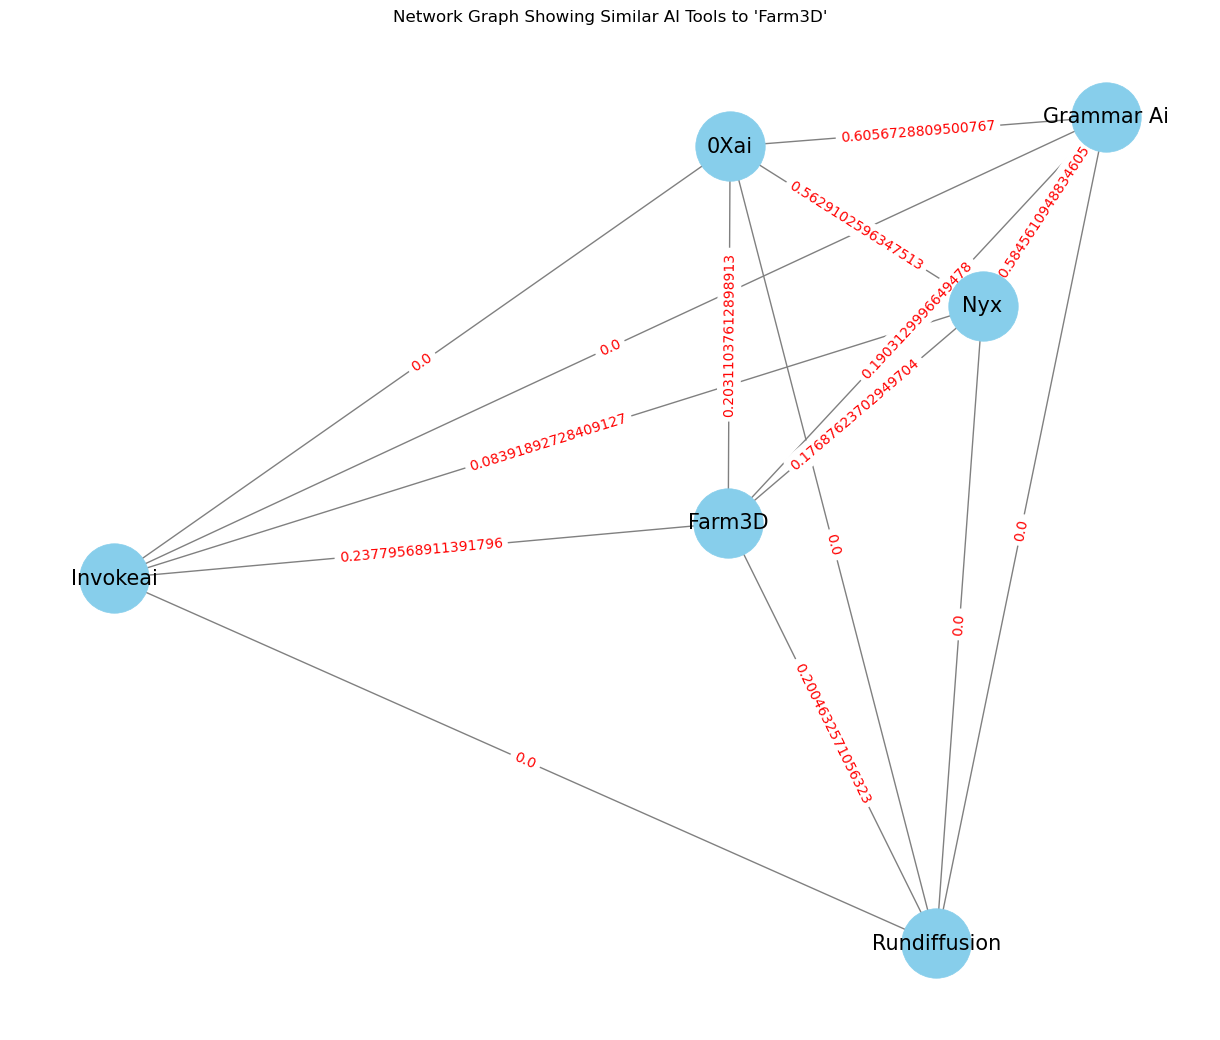

In [62]:
# Function to create a network graph for a given AI tool and its top-n similar AI tools
def create_network_graph(aitool, df, similarity, top_n=5):
    # Get the standardized name of the AI tool
    standardized_aitool = aitool.strip().lower()
    
    # Include the AI tool itself in the list to show connections
    similar_tools_with_self = [aitool] + recommend_ai_tools(standardized_aitool, df, similarity, top_n)
    
    # Find indices for the AI tool and its similar tools
    indices = df.index[df['aitool'].str.lower().str.strip().isin([name.lower().strip() for name in similar_tools_with_self])].tolist()
    
    # Create a smaller cosine similarity matrix for the selected tools
    small_similarity = similarity[indices][:, indices]
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes with the AI tool names
    for name in similar_tools_with_self:
        G.add_node(name, label=name)
    
    # Add edges between the nodes weighted by the cosine similarity score
    for i in range(len(similar_tools_with_self)):
        for j in range(i+1, len(similar_tools_with_self)):
            # Add an edge between the tools with a weight equal to their similarity score
            G.add_edge(similar_tools_with_self[i], similar_tools_with_self[j], weight=small_similarity[i][j])
    
    # Draw the graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=20)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, edge_color='gray', linewidths=0.5, font_size=15)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title(f"Network Graph Showing Similar AI Tools to '{aitool}'")
    plt.show()

# Create the network graph for 'Farm3D'
create_network_graph('Farm3D', df, similarity, top_n=5)

In [63]:
recommend_ai_tools('acrylic', df, cosine_sim, top_n=5)


['Ai Wall Decor', 'Homebyte', 'Spheroid', 'Ai Reality', 'Generai']

In [64]:
import pickle

# Assuming 'model' is your trained recommendation model
# Serialize the model to a file
with open('model/df.pkl', 'wb') as f:
    pickle.dump(df, f)


In [65]:
import pickle

# Assuming 'model' is your trained recommendation model
# Serialize the model to a file
file_path = 'model/df.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(df, f)

# Print the file path
print("Model saved to:", file_path)


Model saved to: model/df.pkl


In [66]:
pickle.dump(similarity, open('model/similarity.pkl', 'wb'))

In [67]:
pickle.dump(df, open('model/df.pkl', 'wb'))